Benign
[0.376 0.376]
Malignant
[0.624 0.624]


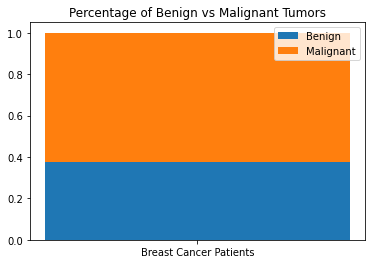

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

weight_counts = {
    "Benign": np.array([.376]),
    "Malignant": np.array([.624]),
}
width = 0.1

fig, ax = plt.subplots()
bottom = 0

for boolean, weight_count in weight_counts.items():
    print(boolean)
    print(weight_count)
    p = ax.bar("Breast Cancer Patients", weight_count, width = 0.01, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Percentage of Benign vs Malignant Tumors")
ax.legend(loc="upper right")

plt.show()

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_lowdim = pca.fit(X.T).components_

Text(0.5, 1.0, 'Malignancy vs Principal Component 1')

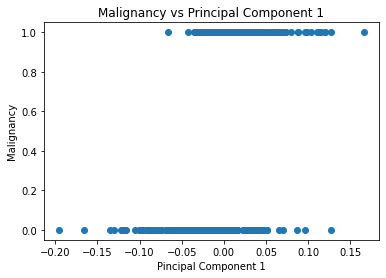

In [27]:
plt.scatter(X_lowdim, y)
plt.xlabel("Pincipal Component 1")
plt.ylabel("Malignancy")
plt.title("Malignancy vs Principal Component 1")

In [2]:
## breast cancer
# Hessian IS invertible

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

k = 30
n_class = 1


# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
print(X)
n, k = X.shape
print(n, k)

# Scale 
sc = StandardScaler()
X = sc.fit_transform(X)

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

y = y.view(y.shape[0], 1)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
569 30


In [3]:
k = 30
n_class = 1

# 
# 1) Model 

import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.fn = lambda x : torch.sigmoid(x)
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        return self.fn(self.linear(x))

model = LogisticRegression(k)


# 2) Loss and optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 3) Training loop 

num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_hat = model(X)
    loss = criterion(y_hat, y)
    
    loss.backward()
    optimizer.step()
    
    optimizer.zero_grad()
    
    print(f"Epoch {epoch+1}: {loss}")

Epoch 1: 0.15300492942333221
Epoch 2: 0.15144841372966766
Epoch 3: 0.14993205666542053
Epoch 4: 0.14845438301563263
Epoch 5: 0.14701400697231293
Epoch 6: 0.14560963213443756
Epoch 7: 0.14423996210098267
Epoch 8: 0.14290380477905273
Epoch 9: 0.14159999787807465
Epoch 10: 0.14032740890979767
Epoch 11: 0.13908497989177704
Epoch 12: 0.13787168264389038
Epoch 13: 0.13668657839298248
Epoch 14: 0.13552871346473694
Epoch 15: 0.13439714908599854
Epoch 16: 0.1332910805940628
Epoch 17: 0.1322096288204193
Epoch 18: 0.13115204870700836
Epoch 19: 0.1301175355911255
Epoch 20: 0.12910538911819458
Epoch 21: 0.12811490893363953
Epoch 22: 0.12714539468288422
Epoch 23: 0.1261962205171585
Epoch 24: 0.12526673078536987
Epoch 25: 0.12435636669397354
Epoch 26: 0.12346451729536057
Epoch 27: 0.12259066849946976
Epoch 28: 0.12173425406217575
Epoch 29: 0.12089476734399796
Epoch 30: 0.12007170915603638
Epoch 31: 0.11926460266113281
Epoch 32: 0.11847302317619324
Epoch 33: 0.11769648641347885
Epoch 34: 0.11693456023

In [4]:
logits = torch.log(y_hat / (1 - y_hat))

In [5]:
x = np.random.normal(170, 10, 250)

plt.hist(x)

NameError: name 'plt' is not defined

In [ ]:
plt.hist(X[:,2].detach().numpy())
plt.show() 

In [38]:
print(scipy.stats.iqr(X_np, axis=0))

[1.15877789 1.31013882 1.19163251 1.0307028  1.34716183 1.2409429
 1.26980978 1.38487893 1.23401892 1.19362265 0.88967025 1.16136152
 0.86679862 0.60152675 0.99237356 1.08258039 0.89391333 1.14714676
 1.00737318 0.87376061 1.19693702 1.40697038 1.22985727 0.99972495
 1.28877521 1.22075212 1.28765529 1.46890986 1.09200191 1.14267415]


In [14]:
import scipy

# summary statistics
mode = np.empty(k)
median = np.empty(k)
iqr = np.empty(k)
for i in range(k):
    
    mode[i] = scipy.stats.mode(X_np[:, i]).mode
    median[i] = np.median(X_np[:,i])
    iqr[i] = scipy.stats.iqr(X_np[:,i])
print(mode.mean())
print(median.mean())
print(iqr.mean())

-0.7800441165765126
-0.2184554314861695
1.140415005882581


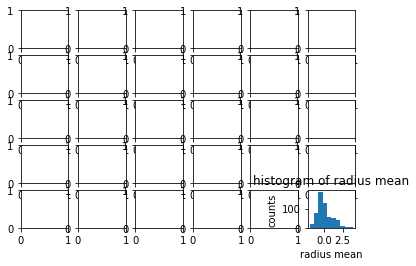

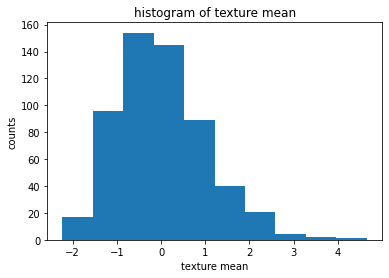

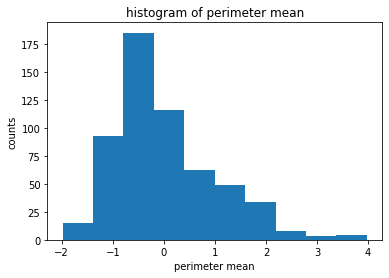

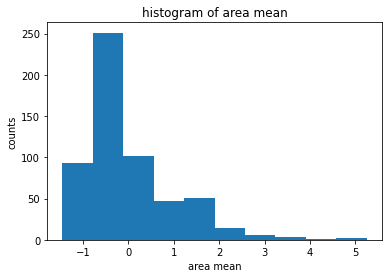

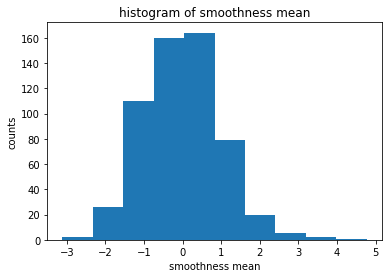

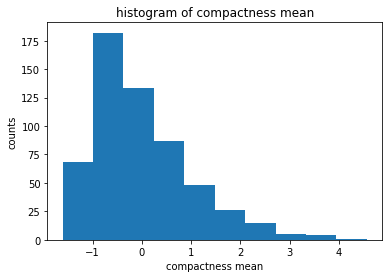

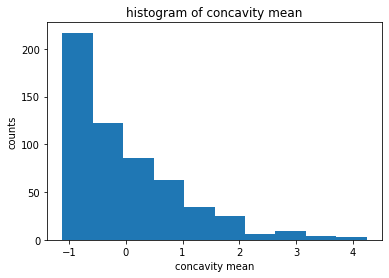

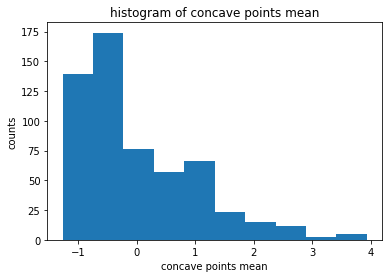

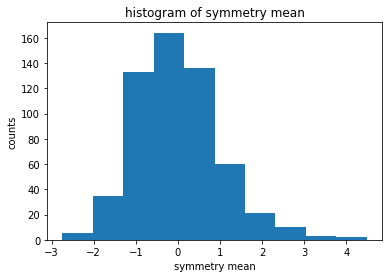

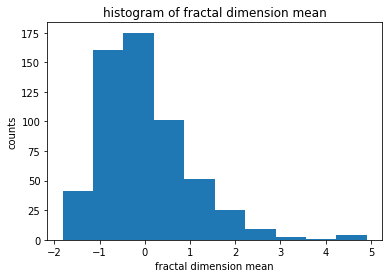

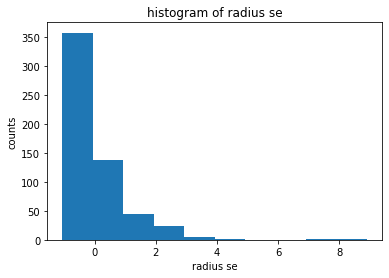

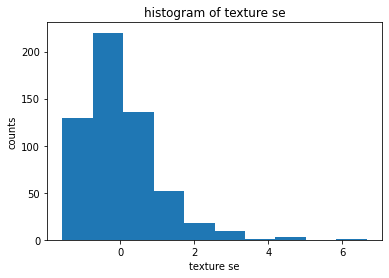

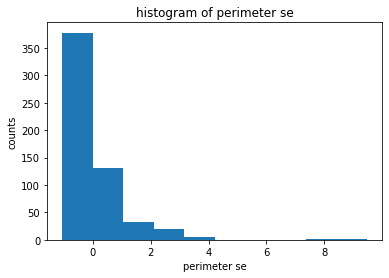

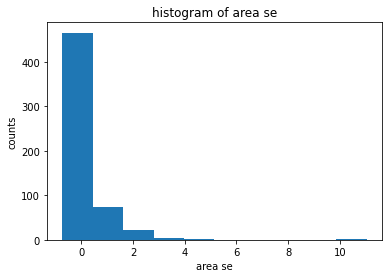

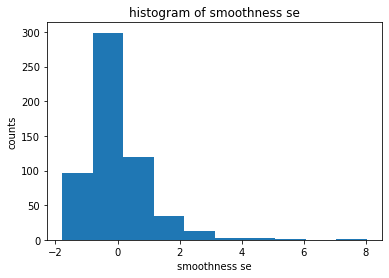

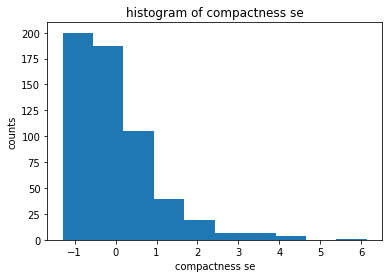

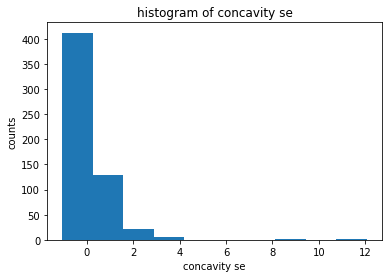

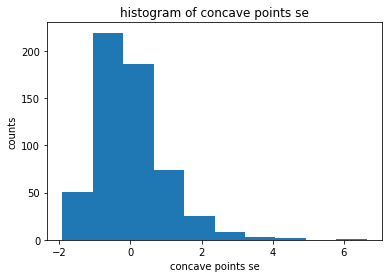

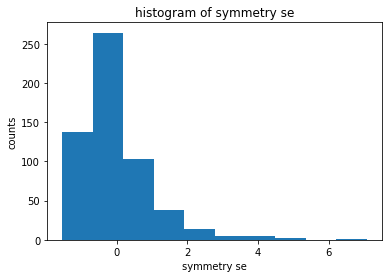

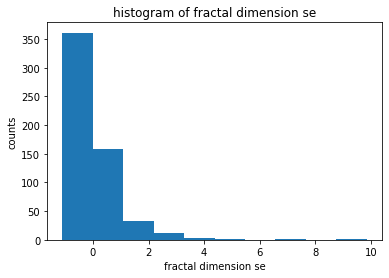

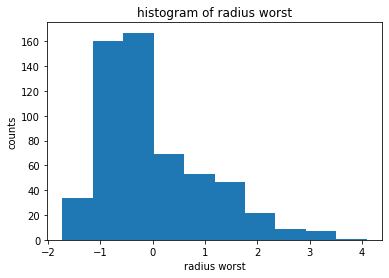

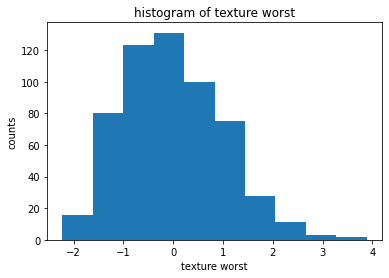

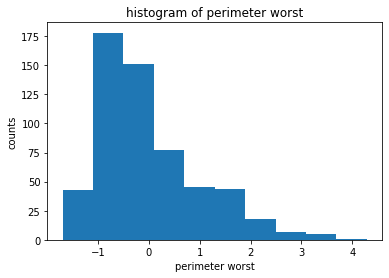

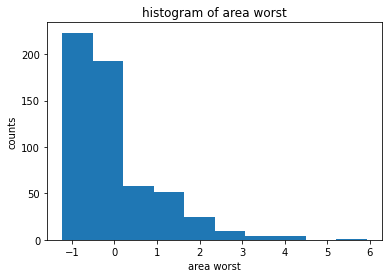

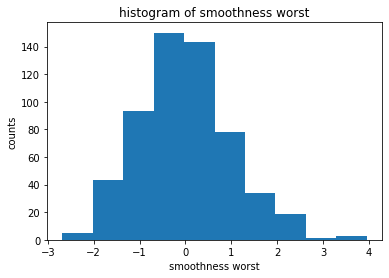

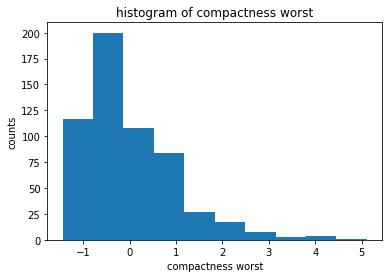

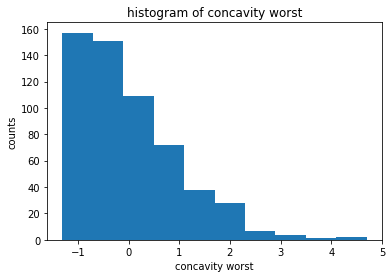

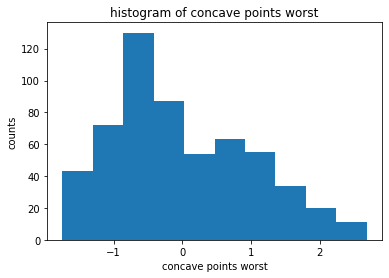

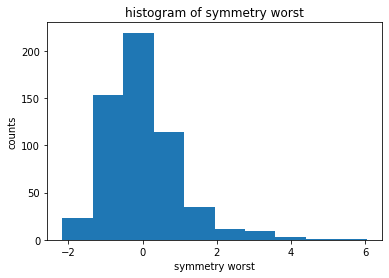

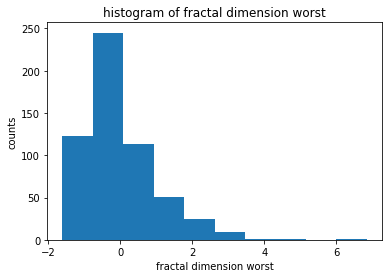

In [5]:
import matplotlib.pyplot as plt

X_np = X.detach().numpy()

vars = ["radius mean", "texture mean", "perimeter mean", "area mean", "smoothness mean", "compactness mean", "concavity mean", "concave points mean", 
       "symmetry mean", "fractal dimension mean", "radius se", "texture se", "perimeter se", "area se", "smoothness se", "compactness se",  "concavity se", "concave points se", 
       "symmetry se", "fractal dimension se", "radius worst", "texture worst", "perimeter worst", "area worst", "smoothness worst", "compactness worst",  "concavity worst", "concave points worst", 
       "symmetry worst", "fractal dimension worst"]

figure, axis = plt.subplots(5, 6)

for i in range(k):
    
    plt.hist(X_np[:,i])

    plt.xlabel(vars[i])
    plt.ylabel("counts")
    plt.title(f"histogram of {vars[i]}")
    
    # change x min , x max , ym in, y max

    plt.show()

In [2]:
import matplotlib.pyplot as plt

X_np = X.detach().numpy()
logits_np = logits.reshape(569).detach().numpy()
vars = ["radius mean", "texture mean", "perimeter mean", "area mean", "smoothness mean", "compactness mean", "concavity mean", "concave points mean", 
       "symmetry mean", "fractal dimension mean", "radius se", "texture se", "perimeter se", "area se", "smoothness se", "compactness se",  "concavity se", "concave points se", 
       "symmetry se", "fractal dimension se", "radius worst", "texture worst", "perimeter worst", "area worst", "smoothness worst", "compactness worst",  "concavity worst", "concave points worst", 
       "symmetry worst", "fractal dimension worst"]

for i in range(k):
    
    a, b = np.polyfit(X_np[:,i], logits_np, 1)
    
        
    plt.figure(figsize=(2.5,1.5))
    plt.scatter(X_np[:,i], logits_np)
    plt.plot(X_np[:,i], a*X_np[:,i] + b)
    plt.xlabel(vars[i])
    plt.ylabel("logits")
    plt.title(f"{vars[i]} vs logits")
    
    # change x min , x max , ym in, y max

    plt.show()

NameError: name 'logits' is not defined

In [26]:
corr.min()

-0.9140137719547302

In [31]:
corr = np.corrcoef(X.T)

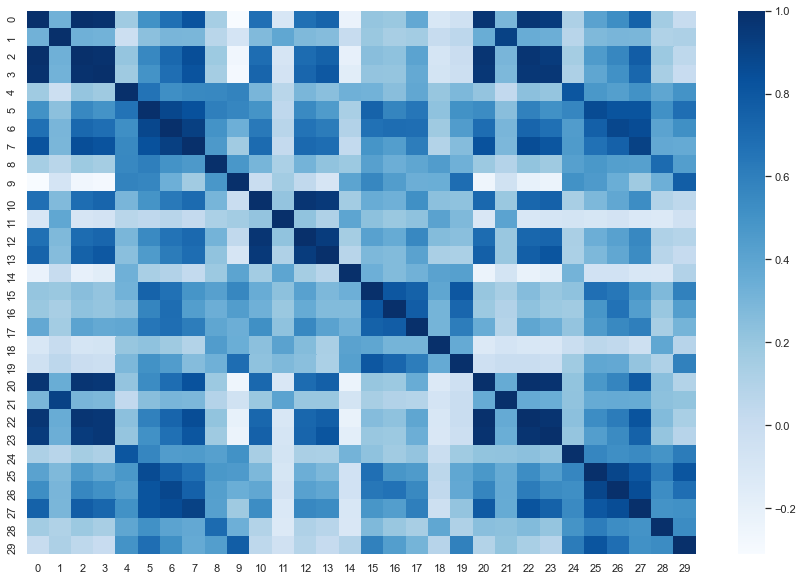

In [20]:
corr = np.corrcoef(X.T)

import seaborn as sb

sb.set(rc={'figure.figsize':(15,10)})
sb.heatmap(corr, cmap="Blues")


plt.show()

In [6]:
np.set_printoptions(suppress=True)
A = np.empty((k, k))
for i in range(k):
    for j in range(k):
        print(np.corrcoef(X[i], X[j]))

[[1. 1.]
 [1. 1.]]
[[1.         0.21183069]
 [0.21183069 1.        ]]
[[1.         0.51598519]
 [0.51598519 1.        ]]
[[1.         0.34577812]
 [0.34577812 1.        ]]
[[1.         0.36560254]
 [0.36560254 1.        ]]
[[1.         0.46705561]
 [0.46705561 1.        ]]
[[1.         0.25420254]
 [0.25420254 1.        ]]
[[1.         0.19842676]
 [0.19842676 1.        ]]
[[1.         0.33399459]
 [0.33399459 1.        ]]
[[1.        0.1180441]
 [0.1180441 1.       ]]
[[ 1.         -0.36866075]
 [-0.36866075  1.        ]]
[[1.         0.53331974]
 [0.53331974 1.        ]]
[[1.        0.0165595]
 [0.0165595 1.       ]]
[[ 1.         -0.44562317]
 [-0.44562317  1.        ]]
[[1.        0.2025486]
 [0.2025486 1.       ]]
[[1.         0.07816708]
 [0.07816708 1.        ]]
[[ 1.         -0.11334668]
 [-0.11334668  1.        ]]
[[1.         0.49633337]
 [0.49633337 1.        ]]
[[1.         0.15115867]
 [0.15115867 1.        ]]
[[1.         0.32518877]
 [0.32518877 1.        ]]
[[1.        

 [0.53331974 1.        ]]
[[1.         0.33197257]
 [0.33197257 1.        ]]
[[1.        0.5147578]
 [0.5147578 1.       ]]
[[1.        0.2656946]
 [0.2656946 1.       ]]
[[1.         0.00769272]
 [0.00769272 1.        ]]
[[1.         0.33836968]
 [0.33836968 1.        ]]
[[1.         0.46021773]
 [0.46021773 1.        ]]
[[1.        0.0378611]
 [0.0378611 1.       ]]
[[1.         0.32269659]
 [0.32269659 1.        ]]
[[1.         0.41177377]
 [0.41177377 1.        ]]
[[1.        0.1606173]
 [0.1606173 1.       ]]
[[1. 1.]
 [1. 1.]]
[[ 1.        -0.2087109]
 [-0.2087109  1.       ]]
[[ 1.         -0.26990441]
 [-0.26990441  1.        ]]
[[1.         0.40050741]
 [0.40050741 1.        ]]
[[1.       0.457223]
 [0.457223 1.      ]]
[[1.         0.21255085]
 [0.21255085 1.        ]]
[[1.         0.40004827]
 [0.40004827 1.        ]]
[[1.         0.31017308]
 [0.31017308 1.        ]]
[[1.         0.06661174]
 [0.06661174 1.        ]]
[[1.         0.25147403]
 [0.25147403 1.        ]]
[[ 1. 

 [-0.42862938  1.        ]]
[[1.         0.46425457]
 [0.46425457 1.        ]]
[[ 1.         -0.05006332]
 [-0.05006332  1.        ]]
[[1.         0.44484541]
 [0.44484541 1.        ]]
[[ 1.         -0.68509171]
 [-0.68509171  1.        ]]
[[1.         0.50131495]
 [0.50131495 1.        ]]
[[1.         0.18204332]
 [0.18204332 1.        ]]
[[1.         0.08639514]
 [0.08639514 1.        ]]
[[ 1.         -0.78620097]
 [-0.78620097  1.        ]]
[[ 1.         -0.40598262]
 [-0.40598262  1.        ]]
[[1.         0.06402822]
 [0.06402822 1.        ]]
[[ 1.         -0.23140745]
 [-0.23140745  1.        ]]
[[1.        0.1094135]
 [0.1094135 1.       ]]
[[ 1.         -0.15190183]
 [-0.15190183  1.        ]]
[[ 1.         -0.48892103]
 [-0.48892103  1.        ]]
[[1.         0.00049943]
 [0.00049943 1.        ]]
[[ 1.         -0.61552186]
 [-0.61552186  1.        ]]
[[1.         0.42846481]
 [0.42846481 1.        ]]
[[1.         0.27139806]
 [0.27139806 1.        ]]
[[1. 1.]
 [1. 1.]]
[[1.   

[[ 1.         -0.35082996]
 [-0.35082996  1.        ]]
[[ 1.         -0.46028564]
 [-0.46028564  1.        ]]
[[1.         0.15918181]
 [0.15918181 1.        ]]
[[1.         0.02665309]
 [0.02665309 1.        ]]
[[1.         0.63043096]
 [0.63043096 1.        ]]
[[1.         0.25784168]
 [0.25784168 1.        ]]
[[1.        0.0020403]
 [0.0020403 1.       ]]
[[ 1.         -0.22218632]
 [-0.22218632  1.        ]]
[[1.         0.15394619]
 [0.15394619 1.        ]]
[[1.         0.53972551]
 [0.53972551 1.        ]]
[[1.         0.42041476]
 [0.42041476 1.        ]]
[[1.         0.40659263]
 [0.40659263 1.        ]]
[[ 1.         -0.19071741]
 [-0.19071741  1.        ]]
[[1.         0.52604437]
 [0.52604437 1.        ]]
[[ 1.         -0.12656411]
 [-0.12656411  1.        ]]
[[1. 1.]
 [1. 1.]]


In [7]:
theta = model.linear.weight.detach()

In [20]:
theta.sum()

tensor(-1.5742)

In [14]:
c_beta = theta.sum()
c_beta_jacobian = torch.ones(k)
c_0 = torch.tensor(0.0)

In [15]:
W = torch.diag((y_hat * (1 - y_hat)).reshape(569))

In [16]:
C = (X.T.matmul(W).matmul(X)).inverse()

In [54]:
chisq = c_beta * 1 / (c_beta_jacobian.matmul(C / 569).reshape(1, k).matmul(c_beta_jacobian)) * c_beta 
print(chisq)

tensor([9944.5439], grad_fn=<MulBackward0>)


In [14]:
import scipy

p_value = 1 - scipy.stats.chi2.cdf(chisq.detach().numpy(), 1)

print(p_value)

[0.]
